# Main Code

Optimizes a comparator with the objective of setting its
comparation threshold.

The following circuit is optimized:

![inversor](https://i.imgur.com/l8MzGeJ.pnghttps://i.imgur.com/l8MzGeJ.png)

These are the optimized parameters: W of M1(W1), L of M1 (L1), W of M2 (W2), L of M2 (L2) and Vcomp.

The simulation used is a DC sweep of Vin.

Ideally, for values of Vin lower than the desired comparation threshold, the output Vou should be Vdd, and 0 otherwise.

In [1]:
import matplotlib.pyplot as plt
import time

## Loads Auxiliary Functions

In [2]:
# LTSpice integration
%run ./ex_ltspice_helper.ipynb

# Genetic Algorithm functions
%run ./ex_ga.ipynb

## Genetic Algorithm Itself

In [3]:
# To time execution
st = time.time()

# circ_name: filname of the circuit
# runs: number of independent runs
# n_params: number of optimized parameters
# mu: number of individuals in each generation
# gens: number of generations
# mut_rate: mutation rate
# k: number of individuas that are possible parents
# target: target treshold voltage

circ_name = "comparator"
runs = 8
n_params = 5
mu = 10
gens = 15
mut_rate = 0.2
k = 2
target = 1

# Fix the seed to have consistant results
np.random.seed(0)

# Mutation and initialization parameters:
# In order: W1, W2, L1, L2, Vcomp
# granularity: minimal mutation increment
# max_inc: maximal mutation increment
# limits: minimal and maximal values after mutation
# Only integers are supported

granularity = np.array([50, 50, 50, 50, 100])
max_inc = np.array([200, 200, 200, 200, 300])
limits = np.array([[500, 5000], [500, 5000], [500, 5000], [500, 5000], [0, 1800]])

# Initialization with random parameters within the limits
# Xs: "mu" individuals with "n_params" parameters for "runs" runs

Xs = np.zeros((mu, n_params,runs))
for i in range(n_params):
    Xs[:, i, :] = np.random.randint(limits[i, 1] - limits[i, 0], size=(mu, runs)) + limits[i, 0]

# Xs_mult: parameter multiplier e.g. W of 1u is 1000 * 1e-9 or 1 * 1e-6
# Xs_names: name of the optimized variables
# the order must be the same for all parameters of initialization and mutation
    
Xs_mult = np.array([1e-9, 1e-9, 1e-9, 1e-9, 1e-3])
Xs_names = np.array(["W1", "W2", "L1", "L2", "Vcomp"])

# Calling the Genetic Algorithm function
# bestS: best fitness for all generations, of each run
# bestXs: best individual for all generations, of each run
# Jhist: fitness history of each run
bestS, bestXs, Jhist = SGA (Xs, Xs_mult, Xs_names, gens, k, mu, max_inc, n_params, limits, granularity, mut_rate, runs, circ_name, target)

# Final time
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Gen:  1 / 15
Gen:  2 / 15
Gen:  3 / 15
Gen:  4 / 15
Gen:  5 / 15
Gen:  6 / 15
Gen:  7 / 15
Gen:  8 / 15
Gen:  9 / 15
Gen:  10 / 15
Gen:  11 / 15
Gen:  12 / 15
Gen:  13 / 15
Gen:  14 / 15
Gen:  15 / 15
Execution time: 51.40862584114075 seconds


## Plots the history of fitness scores

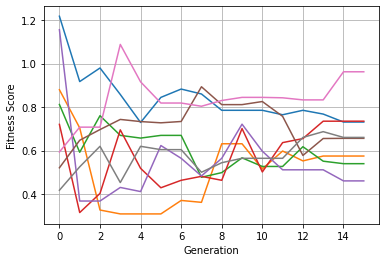

In [4]:
for i in range(0, runs):
    plt.plot(Jhist[:, i])
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.grid()
plt.show()

## Creates a file with the best overall individual

In [5]:
# Finds the individual with the lower (best) finess score
bestX = bestXs[:, np.argmin(bestS)]
print("BestX: ", bestX)

# Creates the circuit schematic with only one individual
# The schematic represents the run of number "99" to avoid conflicts with other filenames
lt_create_gen(circ_name, bestX, Xs_mult, Xs_names, 99)

# Simulates run "99" (best individual)
results = lt_simulate(circ_name, 99)

if results.wait() != 0:
    print("There was an error")

# Reads and parses the results of the simulation of the best individual
sim_type = 'dc'
out_names = ["V(Vout)"]
    
bestSweep, bestOuts = lt_parse(circ_name, sim_type, 99, out_names)
final_outs = []
for j in range(len(out_names)):
    final_out = bestOuts[0,j, :]
    final_outs.append(final_out)

BestX:  [2939. 2589. 1726. 2130.  648.]


## Plot of the final result

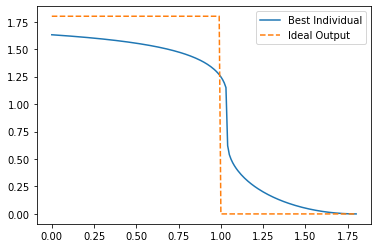

Best score:  0.3089621695540272


In [6]:
plt.plot(bestSweep[0], final_outs[0], label="Best Individual")
target_signal = (bestSweep[0] < target)*1.8
plt.plot(bestSweep[0], target_signal, '--', label="Ideal Output")

plt.legend(loc="upper right")

plt.show()
print("Best score: ", np.min(bestS))